**This notebook demonstrates basic entanglement**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$
For multi-qubit states, we use notation:
    $$\ket{n...21}$$
where $1$ is the first qubit, $2$ is the second qubit, $...$, $n$ is the last qubit. When displaying the circuit, the first qubit is at the top.

In [1]:
import os, sys
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools

# Get a backend
IBMQ.load_accounts()
simulator = backend_tools.get_device(use_sim=True, min_qubits=5)

Entanglement:
- when two or more quantum objects are entangled, they behave individually as random, but are correlated.
- an entangled state is a multi-qubit state which, while in a definite state overall, the individual qubits are not:
    - cannot be expressed as a list of individual qubits
    - when one of the qubits is measured it behaves randomly, but its behaviour allows you to predict how the other qubit would behave if measured along the same axis
    
Examples:
- The states $\ket{00}$, $\ket{01}$, $\ket{10}$ and $\ket{11}$ are not entangled (they can be described by attributing a definite state to each qubit)
- The state $\frac{\left(\ket{00} + \ket{01}\right)}{\sqrt{2}}$ is not entangled (it can be expressed as qubit one being in the superposition $\frac{1}{\sqrt{2}}\left(\ket{0}+\ket{1}\right)$ and qubit two being in $\ket{0}$.
- The state $\frac{\left(\ket{10} + \ket{01}\right)}{\sqrt{2}}$ is entangled because it cannot be expressed as a list of individual states


**Create an unentangled state**

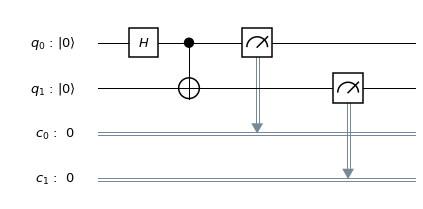

In [2]:
# Define the quantum circuit
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

# Create an unentangled state
circuit.h(q[0])
circuit.cx(q[0], q[1])

# Finish off with the measurement along the z-axis
circuit.measure(q, c)

# Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

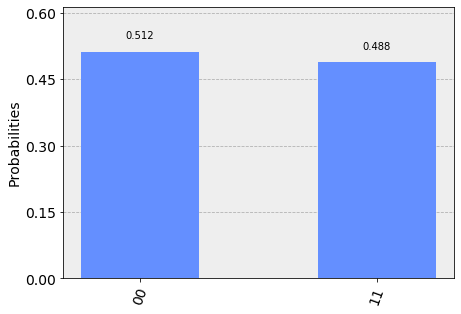

In [3]:
# Simulate or run the circuit
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

# Plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)

**Create an unentangled state**

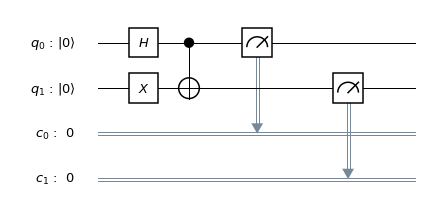

In [5]:
# Define the quantum circuit
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

# Create an entangled state
circuit.h(q[0])
circuit.x(q[1])
circuit.cx(q[0], q[1])

# Finish off with the measurement along the z-axis
circuit.measure(q, c)

# Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

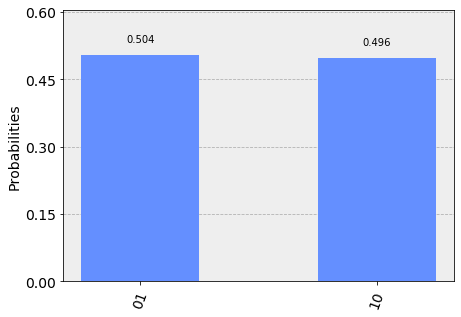

In [6]:
# Simulate or run the circuit
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

# Plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)